In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sn

In [4]:
import sqlalchemy
from sqlalchemy import create_engine

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
import matplotlib.pyplot as plt
import statistics as st
from datetime import date

In [9]:
!pip install openpyxl

# Data Pre-processing

In [19]:
#Finding the null values
car_data=pd.read_excel('DS1_C4_S9_Car_Data.xlsx')
car_data

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,24.0,Petrol,1652.0,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,15.0,CNG,1652.0,...,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,24.0,Petrol,1652.0,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1545 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
1272,1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1550 kg,"Drive side airbag, Curtain airbags, Driver fro...",Yes,Yes
1273,1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1482 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes
1274,1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1455 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes


In [20]:
car_data.isnull().sum()

S. No.                               0
Make                                75
Model                                0
Variant                              0
Displacement                        12
Cylinders                           66
Valves_Per_Cylinder                102
Fuel_Tank_Capacity_litre            69
Fuel_Type                            0
Height_mm                            1
Length_mm                            0
Width_mm                            12
Body_Type                            6
Doors                                4
City_Mileage_km_litre              555
Highway_Mileage_km_litre           800
Kerb_Weight                        365
Power                                0
Torque                               2
Seating_Capacity                     6
Central_Locking                    149
Child_Safety_Locks                  75
Hill_Assist                        796
Drive_Modes                       1081
High_Speed_Alert_System           1068
ABS_(Anti-lock_Braking_Sy

In [21]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   S. No.                          1276 non-null   int64  
 1   Make                            1201 non-null   object 
 2   Model                           1276 non-null   object 
 3   Variant                         1276 non-null   object 
 4   Displacement                    1264 non-null   float64
 5   Cylinders                       1210 non-null   float64
 6   Valves_Per_Cylinder             1174 non-null   float64
 7   Fuel_Tank_Capacity_litre        1207 non-null   float64
 8   Fuel_Type                       1276 non-null   object 
 9   Height_mm                       1275 non-null   float64
 10  Length_mm                       1276 non-null   float64
 11  Width_mm                        1264 non-null   float64
 12  Body_Type                       12

# DATA PRE-PROCESSING

In [26]:
car_data['Make'].value_counts()
car_data['Make']=car_data['Make'].fillna('N/A')

In [28]:
car_data['Displacement'].value_counts()
car_data['Displacement']=car_data['Displacement'].fillna(car_data['Displacement'].median())

In [30]:
car_data['Drive_Modes'].value_counts()
car_data['Drive_Modes']=car_data['Drive_Modes'].fillna('N/A')

In [32]:
car_data['Cylinders'].value_counts()
car_data['Cylinders']=car_data['Cylinders'].fillna(car_data['Cylinders'].median())

In [33]:
car_data['Valves_Per_Cylinder'].value_counts()
car_data['Valves_Per_Cylinder']=car_data['Valves_Per_Cylinder'].fillna(car_data['Valves_Per_Cylinder'].median())

In [34]:
car_data['Fuel_Tank_Capacity_litre'].value_counts()
car_data['Fuel_Tank_Capacity_litre']=car_data['Fuel_Tank_Capacity_litre'].fillna(car_data['Fuel_Tank_Capacity_litre'].median())

In [38]:
car_data['Height_mm'].value_counts()
car_data['Height_mm']=car_data['Height_mm'].fillna(car_data['Height_mm'].median())

In [40]:
car_data['Width_mm'].value_counts()
car_data['Width_mm']=car_data['Width_mm'].fillna(car_data['Width_mm'].median())

In [41]:
car_data['City_Mileage_km_litre'].value_counts()
car_data['City_Mileage_km_litre']=car_data['City_Mileage_km_litre'].fillna(car_data['City_Mileage_km_litre'].median())

In [44]:
car_data['Highway_Mileage_km_litre'].value_counts()
car_data['Highway_Mileage_km_litre']=car_data['Highway_Mileage_km_litre'].fillna(car_data['Highway_Mileage_km_litre'].median())

In [46]:
car_data['Doors'].value_counts()
car_data['Doors']=car_data['Doors'].fillna(car_data['Doors'].median())

In [48]:
car_data['Body_Type'].value_counts()
car_data['Body_Type']=car_data['Body_Type'].fillna(car_data['Body_Type'].mode())

# 1.MARKET SEGMENTATION ANALYSIS

In [26]:
car_make=car_data.groupby(['Make'])[['Variant']].count()
car_make

,Variant
Make,
Aston Martin,3
Audi,31
Bajaj,2
Bentley,6
Bmw,37
Bugatti,2
Datsun,15
Dc,1
Ferrari,8


In [27]:
car_model=car_data.groupby(['Make'])[['Model']].count()
car_model

,Model
Make,
Aston Martin,3
Audi,31
Bajaj,2
Bentley,6
Bmw,37
Bugatti,2
Datsun,15
Dc,1
Ferrari,8


In [28]:
car_bodytype=car_data.groupby(['Body_Type'])[['Make']].count()
car_bodytype

,Make
Body_Type,
Convertible,20
Coupe,41
"Coupe, Convertible",1
Crossover,18
"Crossover, SUV",2
Hatchback,316
MPV,39
MUV,39
Pick-up,3


In [51]:
group_by_car=car_data.groupby(by=['Make'])[['Body_Type']].count()
group_by_car

,Body_Type
Make,
Aston Martin,3
Audi,31
Bajaj,2
Bentley,6
Bmw,37
Bugatti,2
Datsun,15
Dc,1
Ferrari,8


# TASK-1 : Most preferred car body types

In [55]:
preferred_body_type=car_data.groupby(by='Body_Type')['Body_Type'].count()
preferred_body_type_sorted=preferred_body_type.sort_values(ascending=False)
top_5_body_types=preferred_body_type_sorted.head(5).reset_index(name='Count')
top_5_body_types

,Body_Type,Count
0,SUV,447
1,Sedan,333
2,Hatchback,316
3,Coupe,41
4,MPV,39


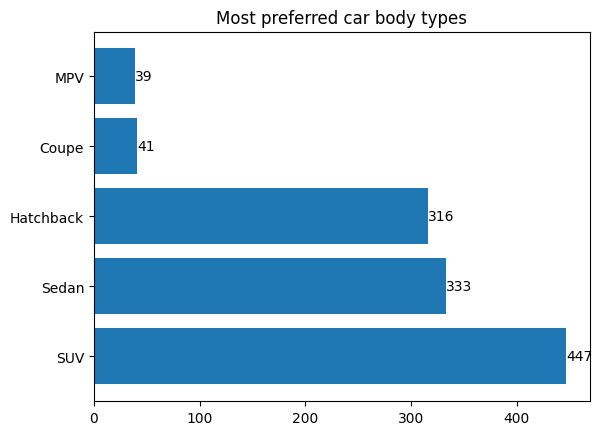

In [57]:
plt.barh(top_5_body_types['Body_Type'],top_5_body_types['Count'])
for index, value in enumerate(top_5_body_types['Count']):
    plt.text(value, index, str(value), va='center', ha='left', color='black')
plt.title("Most preferred car body types")
plt.show()

# TASK-2: Details of cars adopting various Drive Modes

In [60]:
car_data.groupby(['Drive_Modes'])[['Drive_Modes']].count()
filtered_df = car_data[(car_data['Drive_Modes'] =='Normal, Comfort, Eco, Sport, Power Mode')]
filtered_df

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
321,321,Audi,Q8,55 Tfsi Quattro Tiptronic,2995.0,4.0,4.0,85.0,Petrol,1740.0,...,Yes,Yes,Yes,"Normal, Comfort, Eco, Sport, Power Mode",Yes,Yes,2830 kg,"Driver head airbag, Front passenger head airba...",Yes,Yes
330,330,Audi,A8 L,55 Tfsi Quattro,2995.0,8.0,4.0,82.0,Petrol,1485.0,...,Yes,Yes,Yes,"Normal, Comfort, Eco, Sport, Power Mode",Yes,Yes,NaN,"Driver head airbag, Drive side airbag, Curtain...",Yes,Yes


In [62]:
car_count = len(filtered_df)
print("Number of cars with all modes:", car_count)

Number of cars with all modes: 2


# 2.FUEL EFFICIENCY ANALYSIS

In [37]:
car_mileage=car_data.groupby(['Make'])[['City_Mileage_km_litre']].mean()
car_mileage

,City_Mileage_km_litre
Make,
Aston Martin,6.700000
Audi,13.633871
Bajaj,15.290000
Bentley,6.731667
Bmw,14.596757
Bugatti,15.290000
Datsun,18.684000
Dc,8.000000
Ferrari,8.433750


In [65]:
car_hw_mileage=car_data.groupby(['Make'])[['Highway_Mileage_km_litre']].mean()
car_hw_mileage

,Highway_Mileage_km_litre
Make,
Aston Martin,12.696667
Audi,16.230968
Bajaj,17.190000
Bentley,9.398333
Bmw,16.677297
Bugatti,17.190000
Datsun,19.006000
Dc,10.000000
Ferrari,10.758750


# TASK-3: Top 10 manufacturers based on city mileage

In [68]:
filt_mileage = car_data[['Make', 'Model','City_Mileage_km_litre']]
sorted_mileage=filt_mileage.sort_values(by='City_Mileage_km_litre',ascending=False)
sorted_mileage.duplicated(keep='first')
refined_mileage = sorted_mileage.drop_duplicates(subset=['Model'], keep='first') 
refined_mileage

,Make,Model,City_Mileage_km_litre
688,Mahindra,E Verito,110.00
616,Mahindra,E2O Plus,80.00
160,Maruti Suzuki,Dzire,28.40
1089,Maruti Suzuki,Ciaz,28.09
901,Maruti Suzuki,Baleno,27.39
...,...,...,...
858,Maserati,Grancabrio,4.00
878,Lamborghini,Aventador,3.60
1172,Ferrari,458 Spider,3.20
873,Ferrari,488 Gtb,3.20


In [70]:
top_10_mileage=refined_mileage.head(10).reset_index(drop=True)
top_10_mileage

,Make,Model,City_Mileage_km_litre
0,Mahindra,E Verito,110.00
1,Mahindra,E2O Plus,80.00
2,Maruti Suzuki,Dzire,28.40
3,Maruti Suzuki,Ciaz,28.09
4,Maruti Suzuki,Baleno,27.39
5,Honda,Wr-V,25.50
6,Renault,Kwid,25.17
7,Tata,Tigor,24.12
8,Hyundai,Grand I10 Prime,24.00
9,Tata,Tiago,23.84


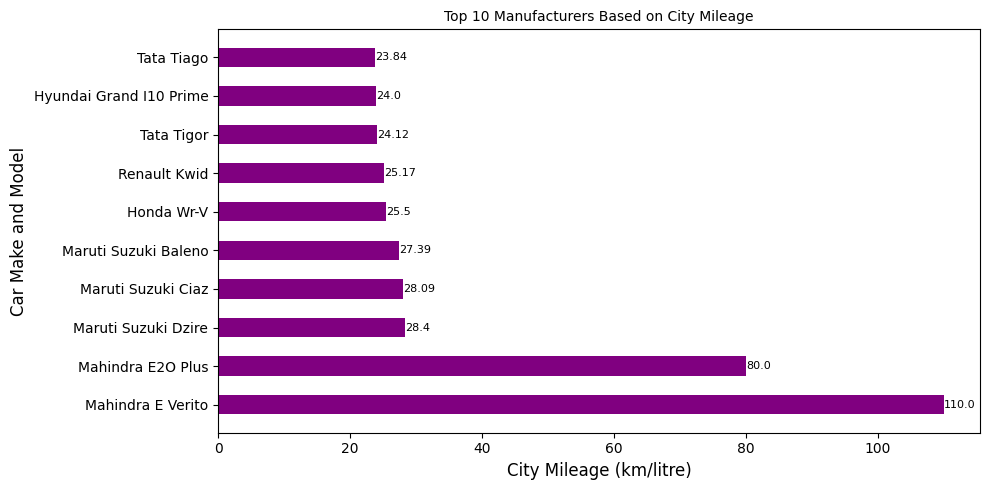

In [72]:
top_10_mileage['Car_Label'] = top_10_mileage['Make'] + ' ' + top_10_mileage['Model']

plt.figure(figsize=(10,5))

top_10_mileage['Car_Label'] = top_10_mileage['Car_Label'].astype(str)

plt.barh(top_10_mileage['Car_Label'], top_10_mileage['City_Mileage_km_litre'], color='purple',height=0.5)
for index, value in enumerate(top_10_mileage['City_Mileage_km_litre']):
    plt.text(value, index, str(value), va='center', ha='left', color='black',fontsize=8)

plt.title("Top 10 Manufacturers Based on City Mileage", fontsize=10)
plt.xlabel("City Mileage (km/litre)", fontsize=12)
plt.ylabel("Car Make and Model", fontsize=12)

plt.tight_layout()

plt.show()


# TASK-4: Top 20 non-electric cars by city mileage

In [74]:
car_data.isnull().sum()
filtered_data=car_data[['Make','Model', 'Fuel_Type','City_Mileage_km_litre']]
filtered_data

,Make,Model,Fuel_Type,City_Mileage_km_litre
0,Tata,Nano Genx,Petrol,23.60
1,Tata,Nano Genx,Petrol,23.60
2,Tata,Nano Genx,CNG,15.29
3,Tata,Nano Genx,Petrol,23.60
4,Tata,Nano Genx,Petrol,23.60
...,...,...,...,...
1271,Honda,City,Diesel,22.60
1272,Honda,City,Diesel,22.60
1273,Honda,City,Petrol,18.00
1274,Honda,City,Petrol,14.30


In [76]:
non_electric_df = filtered_data[(filtered_data['Fuel_Type'] !='Electric')]
non_electric_df

,Make,Model,Fuel_Type,City_Mileage_km_litre
0,Tata,Nano Genx,Petrol,23.60
1,Tata,Nano Genx,Petrol,23.60
2,Tata,Nano Genx,CNG,15.29
3,Tata,Nano Genx,Petrol,23.60
4,Tata,Nano Genx,Petrol,23.60
...,...,...,...,...
1271,Honda,City,Diesel,22.60
1272,Honda,City,Diesel,22.60
1273,Honda,City,Petrol,18.00
1274,Honda,City,Petrol,14.30


In [78]:
avg_mileage=non_electric_df.groupby(by=['Make','Fuel_Type'])[['City_Mileage_km_litre']].median()
avg_mileage


City_Mileage_km_litre
Make         Fuel_Type                       
Aston Martin Petrol                     6.000
Audi         Diesel                    12.000
             Petrol                    15.290
Bajaj        CNG                       15.290
             Petrol                    15.290
...                                       ...
Volkswagen   Diesel                    15.290
             Petrol                    15.290
Volvo        Diesel                    13.200
             Hybrid                    10.145
             Petrol                    13.200

[82 rows x 1 columns]

In [80]:
sorted_df=avg_mileage.sort_values(by='City_Mileage_km_litre',ascending=False)
sorted_df
top_20_non_electric=sorted_df.head(20).reset_index()
top_20_non_electric

,Make,Fuel_Type,City_Mileage_km_litre
0,Renault,Petrol,25.17
1,Maruti Suzuki,Diesel,23.65
2,Honda,Hybrid,21.00
3,Datsun,Petrol,20.60
4,Toyota,Diesel,18.10
5,Lexus,Diesel,18.00
6,Fiat,Diesel,17.20
7,Hyundai,Diesel,17.01
8,Renault,Diesel,16.00
9,Nissan,Diesel,16.00


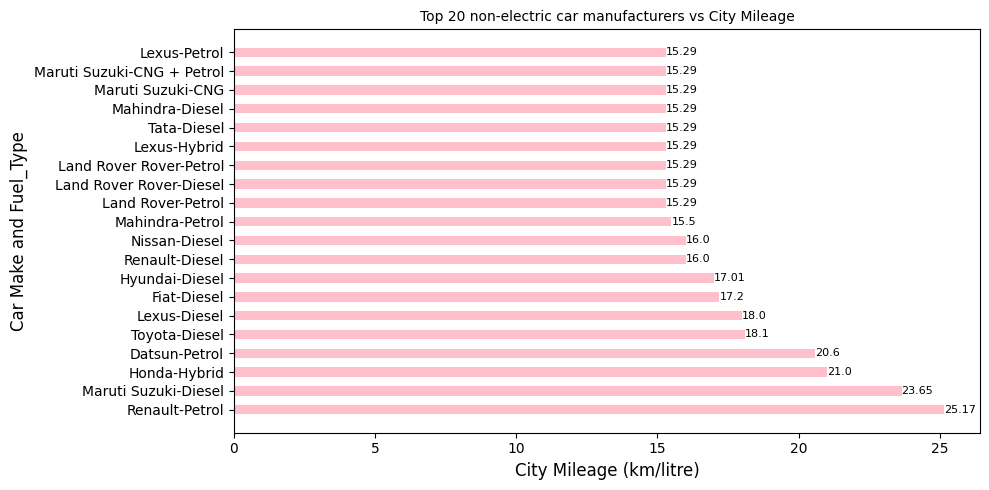

In [82]:
top_20_non_electric['Car_Label'] = top_20_non_electric['Make'] + '-' + top_20_non_electric['Fuel_Type']

plt.figure(figsize=(10,5))

top_20_non_electric['Car_Label'] = top_20_non_electric['Car_Label'].astype(str)

plt.barh(top_20_non_electric['Car_Label'], top_20_non_electric['City_Mileage_km_litre'], color='pink',height=0.5)
for index, value in enumerate(top_20_non_electric['City_Mileage_km_litre']):
    plt.text(value, index, str(value), va='center', ha='left', color='black',fontsize=8)

plt.title("Top 20 non-electric car manufacturers vs City Mileage", fontsize=10)
plt.xlabel("City Mileage (km/litre)", fontsize=12)
plt.ylabel("Car Make and Fuel_Type", fontsize=12)

plt.tight_layout()

plt.show()

# TASK-5: Mean and Median of city and highway mileages

In [85]:
car_city_mileage = car_data[car_data['Make'].isin(["Renault", "Hyundai", "Skoda","Mahindra"])]
car_city_mileage

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
12,12,Renault,Kwid,Rxe 0.8,799.0,3.0,4.0,28.0,Petrol,1490.0,...,NaN,Yes,NaN,N/A,NaN,Yes,NaN,Driver frontal airbag,Yes,Yes
13,13,Renault,Kwid,Std 0.8,799.0,3.0,4.0,28.0,Petrol,1490.0,...,NaN,NaN,NaN,N/A,NaN,Yes,NaN,Driver frontal airbag,NaN,Yes
14,14,Renault,Kwid,Rxl 0.8,799.0,3.0,4.0,28.0,Petrol,1490.0,...,Yes,Yes,NaN,N/A,NaN,Yes,NaN,Driver frontal airbag,Yes,Yes
15,15,Renault,Kwid,Rxt 0.8,799.0,3.0,4.0,28.0,Petrol,1490.0,...,NaN,Yes,NaN,N/A,NaN,Yes,NaN,Driver frontal airbag,Yes,Yes
16,16,Renault,Kwid,Rxt 1.0,999.0,3.0,4.0,28.0,Petrol,1490.0,...,Yes,Yes,NaN,N/A,NaN,Yes,NaN,Driver frontal airbag,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,1249,Skoda,Octavia,Onyx 1.8 Tsi Dsg,1798.0,4.0,4.0,50.0,Petrol,1476.0,...,Yes,Yes,Yes,"Normal, Comfort, Eco, Sport",Yes,Yes,1860 kg,"Drive side airbag, Front passenger curtain air...",Yes,Yes
1250,1250,Skoda,Octavia,Onyx 2.0 Tdi Dsg,1968.0,4.0,4.0,50.0,Diesel,1476.0,...,Yes,Yes,Yes,"Comfort, Eco, Sport, Normal",Yes,Yes,1915 kg,"Drive side airbag, Driver frontal airbag, Fron...",Yes,Yes
1255,1255,Mahindra,Verito,1.5 D2,1461.0,4.0,3.0,50.0,Diesel,1540.0,...,NaN,Yes,NaN,N/A,NaN,NaN,1630 kg,NaN,NaN,NaN
1256,1256,Mahindra,Verito,1.5 D4 Bs-Iv,1461.0,4.0,3.0,50.0,Diesel,1540.0,...,Yes,Yes,NaN,N/A,NaN,NaN,1630 kg,NaN,Yes,NaN


In [95]:
pivot_mean_city_mileage = pd.pivot_table(car_city_mileage,index=["Make"],values=["City_Mileage_km_litre"], aggfunc=np.mean)
mean_city=pivot_mean_city_mileage.reset_index()
mean_city

,Make,City_Mileage_km_litre
0,Hyundai,16.017000
1,Mahindra,18.973866
2,Renault,19.384444
3,Skoda,14.357442


In [97]:
pivot_median_city_mileage = pd.pivot_table(car_city_mileage,index=["Make"],values=["City_Mileage_km_litre"], aggfunc=np.median)
median_city=pivot_median_city_mileage.reset_index()
median_city

,Make,City_Mileage_km_litre
0,Hyundai,15.29
1,Mahindra,15.50
2,Renault,21.04
3,Skoda,15.10


In [99]:
pivot_mean_highway_mileage = pd.pivot_table(car_city_mileage,index=["Make"],values=["Highway_Mileage_km_litre"], aggfunc=np.mean)
mean_highway=pivot_mean_highway_mileage.reset_index()
mean_highway

,Make,Highway_Mileage_km_litre
0,Hyundai,17.538231
1,Mahindra,17.645126
2,Renault,17.315000
3,Skoda,17.252093


In [101]:
pivot_median_highway_mileage = pd.pivot_table(car_city_mileage,index=["Make"],values=["Highway_Mileage_km_litre"], aggfunc=np.median)
median_highway=pivot_median_highway_mileage.reset_index()
median_highway

,Make,Highway_Mileage_km_litre
0,Hyundai,17.19
1,Mahindra,17.19
2,Renault,17.19
3,Skoda,17.19


# TASK-6: Stacked column chart displaying mean and median of city mileages

In [104]:
plot_df = pd.merge(pivot_mean_city_mileage, pivot_median_city_mileage, on='Make').reset_index()
plot_df

,Make,City_Mileage_km_litre_x,City_Mileage_km_litre_y
0,Hyundai,16.017000,15.29
1,Mahindra,18.973866,15.50
2,Renault,19.384444,21.04
3,Skoda,14.357442,15.10


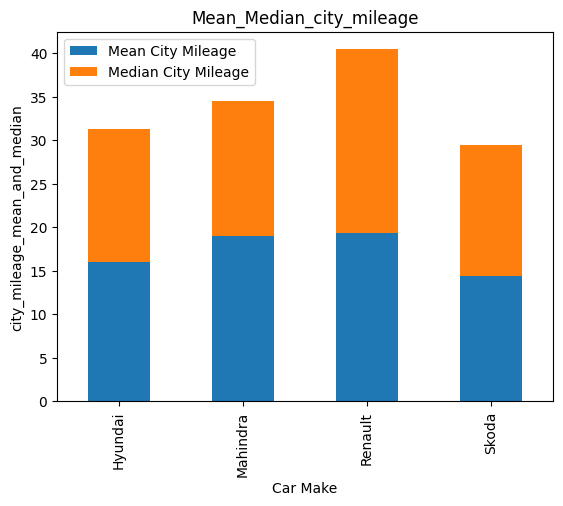

In [106]:
plot_df.plot(x="Make", 
             kind='bar',
             stacked= True,
             title='Mean_Median_city_mileage',
            xlabel= 'Car Make',
             ylabel='city_mileage_mean_and_median' )
plt.legend(['Mean City Mileage', 'Median City Mileage'])

# TASK-7: Horizontal bar chart of average city and highway mileages

In [109]:
car_avg_mileage=car_data.groupby(by=['Make'])[['City_Mileage_km_litre']].mean().reset_index().sort_values(by='City_Mileage_km_litre',ascending=True)
car_avg_mileage

,Make,City_Mileage_km_litre
19,Lamborghini,6.253077
0,Aston Martin,6.700000
3,Bentley,6.731667
7,Dc,8.000000
29,Mitsubishi,8.005714
26,Maserati,8.363333
8,Ferrari,8.433750
14,Icml,8.600000
15,Isuzu,9.900000
30,N/A,11.828400


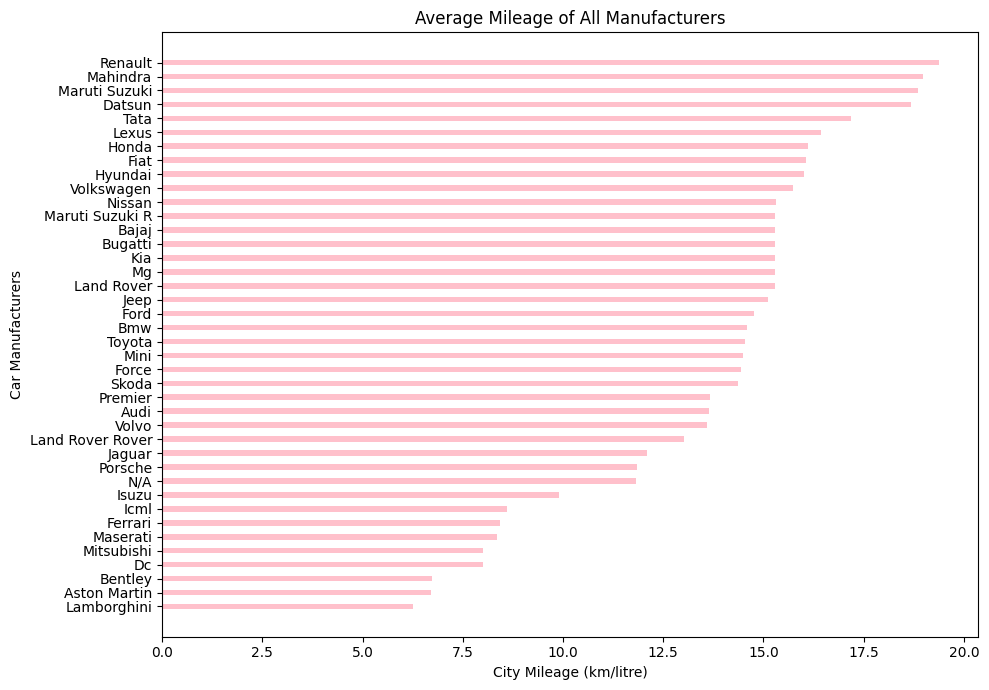

In [111]:
plt.figure(figsize=(10,7))
plt.barh(car_avg_mileage['Make'], car_avg_mileage['City_Mileage_km_litre'], color='pink', height=0.4)
plt.title("Average Mileage of All Manufacturers")
plt.xlabel("City Mileage (km/litre)")
plt.ylabel("Car Manufacturers")
plt.tight_layout()

plt.show()


# TASK-8: Relation between Displacement and City_mileage of top 10 car manufacturers

In [114]:
top_10_cars = (car_data.groupby(by=['Make'])[['City_Mileage_km_litre', 'Displacement']].mean().reset_index().sort_values
    (by=['City_Mileage_km_litre', 'Displacement'], ascending=[False, True]).head(10))
top_10_cars


,Make,City_Mileage_km_litre,Displacement
34,Renault,19.384444,1238.583333
23,Mahindra,18.973866,1715.890756
24,Maruti Suzuki,18.854430,1171.731544
6,Datsun,18.684000,1065.066667
36,Tata,17.182900,1399.540000
22,Lexus,16.434000,3491.600000
12,Honda,16.118906,1444.875000
9,Fiat,16.056087,1269.391304
13,Hyundai,16.017000,1351.684615
38,Volkswagen,15.730000,1466.294118


<Axes: title={'center': 'Line Chart'}, xlabel='City_Mileage_km_litre', ylabel='Displacement'>

<Figure size 1000x600 with 0 Axes>

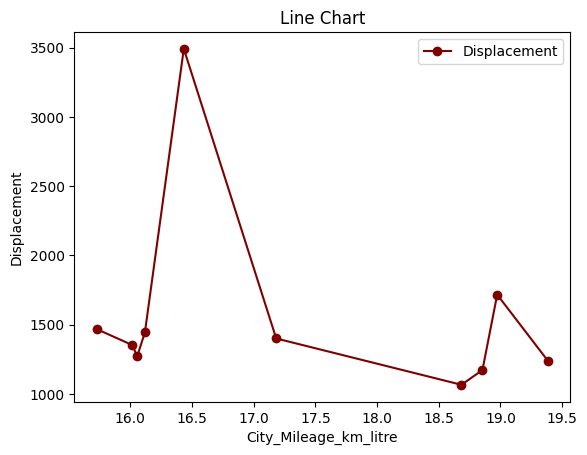

In [116]:
plt.figure(figsize=(10, 6))
top_10_cars.plot(x='City_Mileage_km_litre',
                 y='Displacement',
             kind='line',
             title='Line Chart',
            xlabel= 'City_Mileage_km_litre',
             ylabel='Displacement',
                marker='o', linestyle='-', color='maroon')

# TASK-9:Analyze the spread of fuel economy using a histogram for all car models of the following manufacturers: Hyundai, Suzuki, Tata, and BMW.

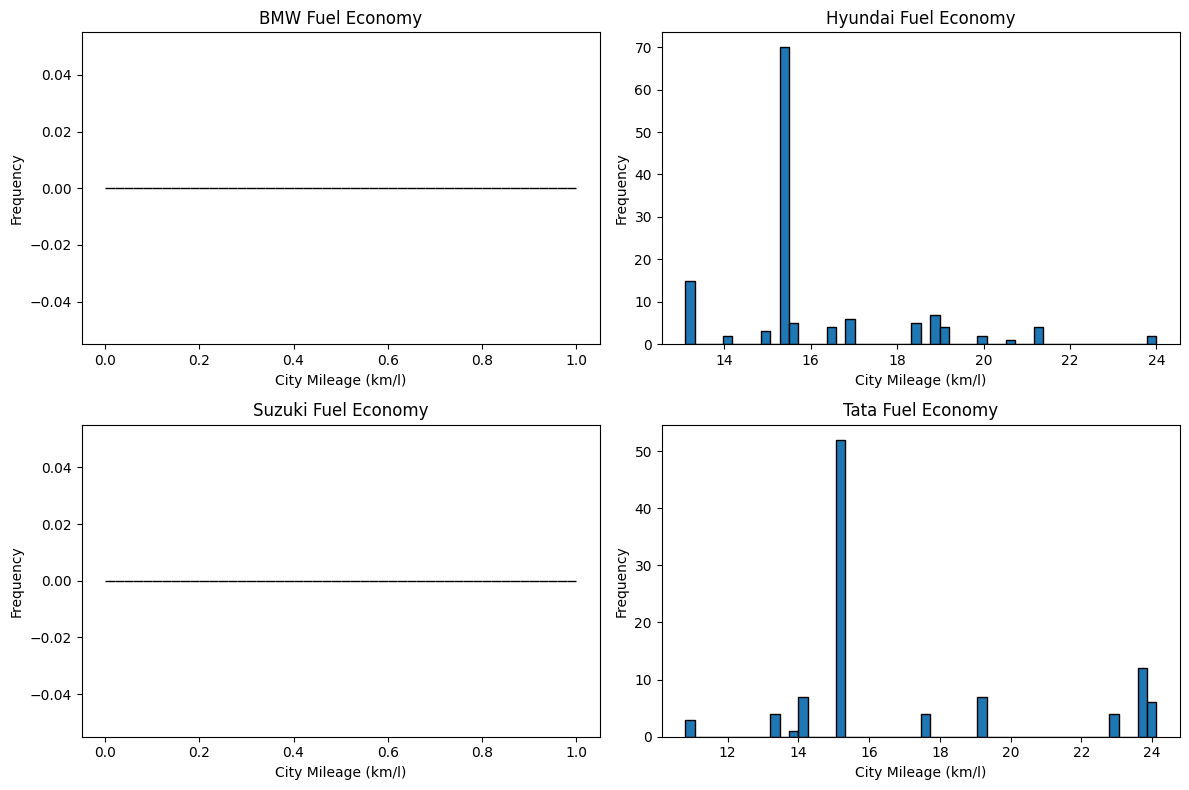

In [119]:

manufacturers = ['BMW','Hyundai','Suzuki','Tata']
df_filtered = car_data[car_data['Make'].isin(manufacturers)]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i, manufacturer in enumerate(manufacturers):
    manufacturer_data = df_filtered[df_filtered['Make'] == manufacturer]
    axes[i].hist(manufacturer_data['City_Mileage_km_litre'].dropna(), bins=50, edgecolor='black')
    axes[i].set_xlabel('City Mileage (km/l)')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{manufacturer} Fuel Economy')

plt.tight_layout()
plt.show()


# TASK-10:Create another data frame that includes only the following columns from the data. Perform missing value treatment, if required.

In [150]:
cols = ['Valves_Per_Cylinder', 'Kerb_Weight', 'Make', 'Displacement', 'Fuel_Tank_Capacity_litre', 
        'City_Mileage_km_litre', 'Highway_Mileage_km_litre', 'Power', 'Torque', 'Gross_Vehicle_Weight']

df2 = pd.DataFrame(car_data, columns=cols)

def clean_weight(value):
    if isinstance(value, str):
        value = value.strip()
        if ' kg' in value:
            value = value.replace(' kg', '')
        if '-' in value: 
            min_val, max_val = value.split('-')
            return (float(min_val) + float(max_val)) / 2
    try:
        return float(value)
    except ValueError:
        return None

df2['Kerb_Weight'] = df2['Kerb_Weight'].apply(clean_weight)
df2['Gross_Vehicle_Weight'] = df2['Gross_Vehicle_Weight'].apply(clean_weight)

df2['Kerb_Weight'] = df2['Kerb_Weight'].fillna(df2['Kerb_Weight'].median())
df2['Power'] = df2['Power'].fillna(df2['Power'].median())
df2['Torque'] = df2['Torque'].fillna(df2['Torque'].median())
df2['Gross_Vehicle_Weight'] = df2['Gross_Vehicle_Weight'].fillna(df2['Gross_Vehicle_Weight'].median())

df2

,Valves_Per_Cylinder,Kerb_Weight,Make,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Power,Torque,Gross_Vehicle_Weight
0,2.0,660.0,Tata,624.0,24.0,23.60,17.19,38.0,51.0,1750.0
1,2.0,725.0,Tata,624.0,24.0,23.60,17.19,38.0,51.0,1750.0
2,2.0,710.0,Tata,624.0,15.0,15.29,17.19,38.0,51.0,1750.0
3,2.0,725.0,Tata,624.0,24.0,23.60,17.19,38.0,51.0,1750.0
4,2.0,725.0,Tata,624.0,24.0,23.60,17.19,38.0,51.0,1750.0
...,...,...,...,...,...,...,...,...,...,...
1271,4.0,1170.0,Honda,1498.0,40.0,22.60,25.10,100.0,200.0,1545.0
1272,4.0,1175.0,Honda,1498.0,40.0,22.60,25.10,100.0,200.0,1550.0
1273,4.0,1107.0,Honda,1497.0,40.0,18.00,18.00,119.0,145.0,1482.0
1274,4.0,1080.0,Honda,1497.0,40.0,14.30,16.40,119.0,145.0,1455.0


# TASK-11: preprocess the specified columns, removing the "kg" text, ensuring the columns are numerical, and converting the weight in kilograms to pounds by multiplying each value by 2.2

In [153]:
cols = [ 'Kerb_Weight','Gross_Vehicle_Weight']

df3 = pd.DataFrame(car_data, columns=cols)

def clean_and_convert_to_pounds(value):
    if isinstance(value, str):
        value = value.strip()  
        if ' kg' in value:
            value = value.replace(' kg', '')  
        try:
            return float(value) * 2.2
        except ValueError:
            return None  
    return None  

df3['Kerb_Weight'] = df3['Kerb_Weight'].apply(clean_and_convert_to_pounds)
df3['Gross_Vehicle_Weight'] = df3['Gross_Vehicle_Weight'].apply(clean_and_convert_to_pounds)

df3['Kerb_Weight'] = df3['Kerb_Weight'].fillna(df2['Kerb_Weight'].median())
df3['Gross_Vehicle_Weight'] = df3['Gross_Vehicle_Weight'].fillna(df3['Gross_Vehicle_Weight'].median())


In [155]:
df3

,Kerb_Weight,Gross_Vehicle_Weight
0,1452.0,3850.0
1,1595.0,3850.0
2,1562.0,3850.0
3,1595.0,3850.0
4,1595.0,3850.0
...,...,...
1271,2574.0,3399.0
1272,2585.0,3410.0
1273,2435.4,3260.4
1274,2376.0,3201.0


# 3.Performance comparison

# TASK-12:Compare the performance of cars based on factors such as displacement, cylinders, and valves per cylinder, providing valuable insights for marketing and product development.

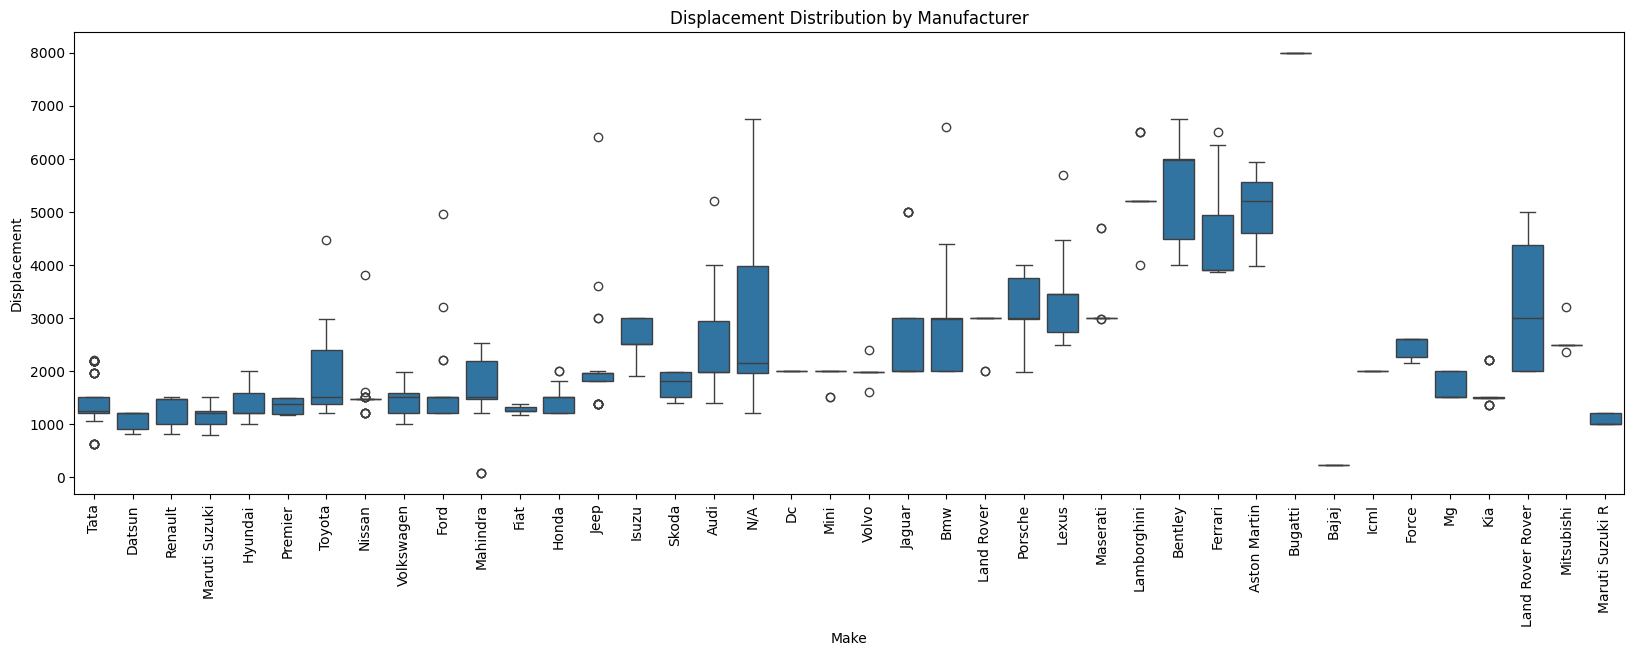

,Mean,Median,Std Dev,CV (%)
Make,,,,
Aston Martin,5038.333333,5198.0,986.241519,19.574757
Audi,2256.354839,1984.0,836.304352,37.064399
Bajaj,216.000000,216.0,0.000000,0.000000
Bentley,5447.833333,5974.0,1164.710164,21.379328
Bmw,2707.918919,2979.0,924.567237,34.143092
Bugatti,7993.000000,7993.0,0.000000,0.000000
Datsun,1065.066667,1198.0,179.470836,16.850667
Dc,2000.000000,2000.0,NaN,NaN
Ferrari,4589.500000,3902.0,1125.891647,24.531902


In [159]:
cars = car_data.groupby('Make')

# Calculating mean, median, and standard deviation for selected columns
mean_values = cars[['Displacement', 'Cylinders', 'Valves_Per_Cylinder']].mean()
median_values = cars[['Displacement', 'Cylinders', 'Valves_Per_Cylinder']].median()
std_values = cars[['Displacement', 'Cylinders', 'Valves_Per_Cylinder']].std()
cv_values = (std_values / mean_values) * 100

# Combining the results into a single DataFrame
stats = pd.DataFrame({
    'Mean': mean_values['Displacement'],
    'Median': median_values['Displacement'],
    'Std Dev': std_values['Displacement'],
    'CV (%)': cv_values['Displacement']})


plt.figure(figsize=(20, 6))
sns.boxplot(x='Make', y='Displacement', data=car_data)
plt.xticks(rotation=90)
plt.title('Displacement Distribution by Manufacturer')
plt.show()

stats

# TASK-13: Identify at least three features that affect the mileages (using correlation analysis) of cars from the following manufacturers: Renault, Toyota, and Honda. 

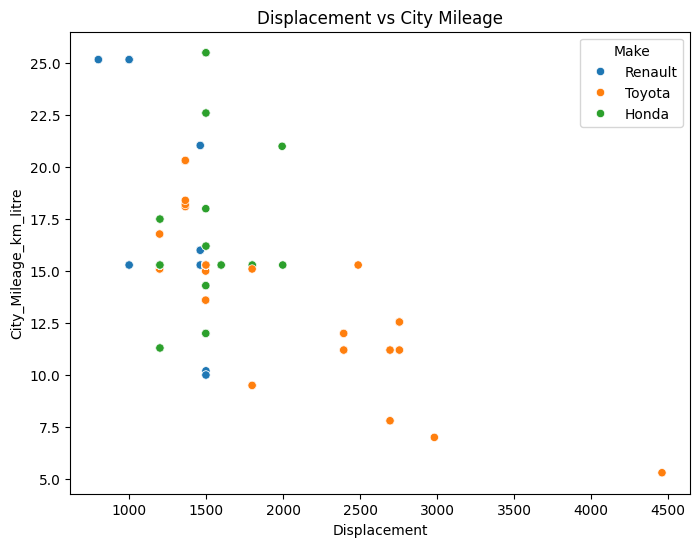

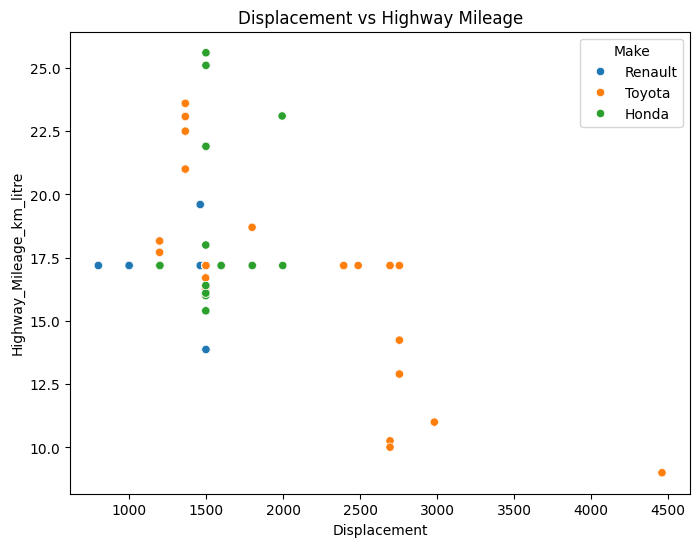

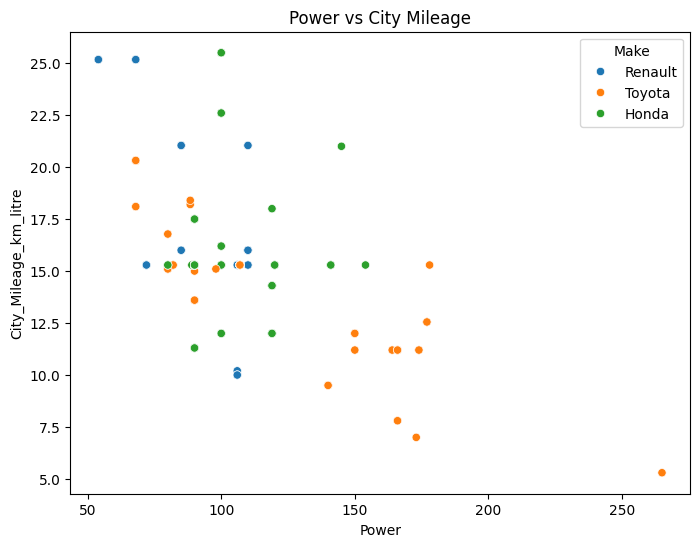

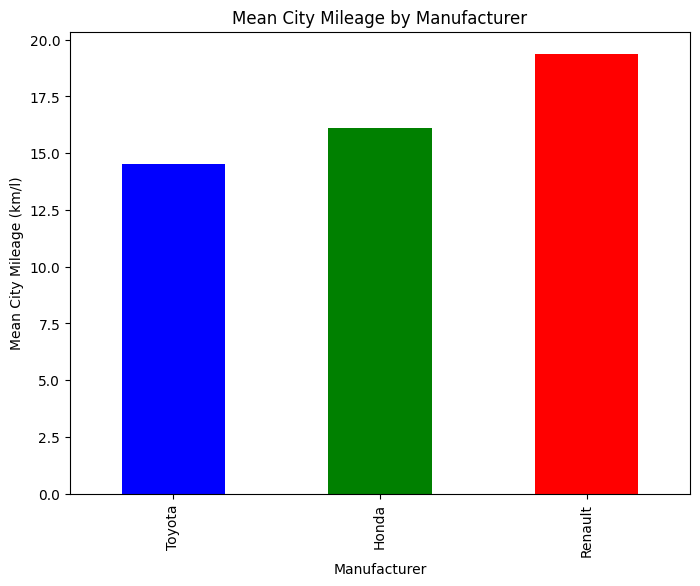

In [161]:

car_data_filtered = car_data[car_data['Make'].isin(['Renault', 'Toyota', 'Honda'])]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=car_data_filtered, x='Displacement', y='City_Mileage_km_litre', hue='Make')
plt.title('Displacement vs City Mileage')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=car_data_filtered, x='Displacement', y='Highway_Mileage_km_litre', hue='Make')
plt.title('Displacement vs Highway Mileage')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=car_data_filtered, x='Power', y='City_Mileage_km_litre', hue='Make')
plt.title('Power vs City Mileage')
plt.show()

mean_city_mileage = car_data_filtered.groupby('Make')['City_Mileage_km_litre'].mean().sort_values()
plt.figure(figsize=(8, 6))
mean_city_mileage.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Mean City Mileage by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Mean City Mileage (km/l)')
plt.show()


# 4.Weight Distribution Study

# TASK-14: Compare the performance of cars based on factors like kerb weight and gross vehicle weight.

In [184]:
import pandas as pd
grouped = df2.groupby('Make')

mean_kerb_weight = grouped['Kerb_Weight'].mean()
median_kerb_weight = grouped['Kerb_Weight'].median()
std_kerb_weight = grouped['Kerb_Weight'].std()
cv_kerb_weight = std_kerb_weight / mean_kerb_weight * 100

mean_gvw = grouped['Gross_Vehicle_Weight'].mean()
median_gvw = grouped['Gross_Vehicle_Weight'].median()
std_gvw = grouped['Gross_Vehicle_Weight'].std()
cv_gvw = std_gvw / mean_gvw * 100

statistics_df = pd.DataFrame({
    'Mean_Kerb_Weight': mean_kerb_weight,
    'Median_Kerb_Weight': median_kerb_weight,
    'Std_Kerb_Weight': std_kerb_weight,
    'CV_Kerb_Weight': cv_kerb_weight,
    'Mean_GVW': mean_gvw,
    'Median_GVW': median_gvw,
    'Std_GVW': std_gvw,
    'CV_GVW': cv_gvw})

statistics_df = statistics_df.reset_index()
statistics_df

top_5_cv_kerb_weight = statistics_df.sort_values(by='CV_Kerb_Weight', ascending=False).tail(10)
top_5_cv_kerb_weight



,Make,Mean_Kerb_Weight,Median_Kerb_Weight,Std_Kerb_Weight,CV_Kerb_Weight,Mean_GVW,Median_GVW,Std_GVW,CV_GVW
3,Bentley,2457.833333,2425.0,122.261059,4.974343,3065.666667,3086.0,201.591336,6.575775
9,Fiat,1203.043478,1215.0,51.356577,4.268888,1646.304348,1750.0,324.465355,19.708710
33,Premier,1123.333333,1145.0,33.565856,2.988058,1530.000000,1530.0,0.000000,0.000000
14,Icml,1717.636364,1710.0,13.078782,0.761441,2473.636364,2460.0,23.354968,0.944155
18,Kia,1225.000000,1225.0,0.000000,0.000000,1750.000000,1750.0,0.000000,0.000000
27,Mg,1225.000000,1225.0,0.000000,0.000000,1750.000000,1750.0,0.000000,0.000000
5,Bugatti,1995.000000,1995.0,0.000000,0.000000,1750.000000,1750.0,0.000000,0.000000
2,Bajaj,1225.000000,1225.0,0.000000,0.000000,1750.000000,1750.0,0.000000,0.000000
10,Force,1225.000000,1225.0,0.000000,0.000000,2345.000000,2510.0,475.878136,20.293311
7,Dc,1580.000000,1580.0,NaN,NaN,1580.000000,1580.0,NaN,NaN


In [186]:
statistics_df

,Make,Mean_Kerb_Weight,Median_Kerb_Weight,Std_Kerb_Weight,CV_Kerb_Weight,Mean_GVW,Median_GVW,Std_GVW,CV_GVW
0,Aston Martin,1733.333333,1680.0,234.591844,13.534145,1860.333333,1750.0,191.102939,10.272511
1,Audi,1810.000000,1780.0,342.378932,18.915963,2260.645161,2185.0,406.299852,17.972739
2,Bajaj,1225.000000,1225.0,0.000000,0.000000,1750.000000,1750.0,0.000000,0.000000
3,Bentley,2457.833333,2425.0,122.261059,4.974343,3065.666667,3086.0,201.591336,6.575775
4,Bmw,1503.702703,1590.0,261.056174,17.360890,2024.594595,1750.0,349.949160,17.284900
5,Bugatti,1995.000000,1995.0,0.000000,0.000000,1750.000000,1750.0,0.000000,0.000000
6,Datsun,1008.400000,864.0,183.060412,18.153551,1750.000000,1750.0,0.000000,0.000000
7,Dc,1580.000000,1580.0,NaN,NaN,1580.000000,1580.0,NaN,NaN
8,Ferrari,1633.750000,1577.5,204.376229,12.509639,1750.000000,1750.0,0.000000,0.000000
9,Fiat,1203.043478,1215.0,51.356577,4.268888,1646.304348,1750.0,324.465355,19.708710
